In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
json_path="./scaling-01.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
nodes = []
draw = []
mpi = []
balancer = []

for d in data["datapoints"]:
    comp_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    draw_time = np.asarray(list(map(lambda x: x["drawTime"],
                   d["data"]["workers"])))
    mpi_time = np.asarray(list(map(lambda x: x["mpiTime"],
                   d["data"]["workers"])))
    balancer_time = d["data"]["balancer"]["time"]
    
    nodes.append(np.average(comp_time))
    draw.append(np.average(draw_time))
    mpi.append(np.average(mpi_time))
    balancer.append(balancer_time)


# time in s
nodes = np.asarray(nodes) / 1e6
draw = np.asarray(draw) / 1e6
mpi = np.asarray(mpi) / 1e6
balancer = np.asarray(balancer) / 1e6
        
print(nodes, draw, mpi, balancer)

[66.312526   33.1337525  22.35953733 16.79845225 13.3666122  11.13947533
  9.48011629  8.28840113  7.37286656  6.6423153   6.04358109  5.52280008
  5.09793462  4.73427193  4.41868293  4.14953213  3.90418847  3.68739022
  3.49171437  3.31696885  3.16044848  3.015407    2.88453252  2.76432742
  2.65378784  2.55190888  2.45695533  2.37128364  2.29063993  2.21135657
  2.13861771  2.07160703  2.0089797   1.95049041  1.89422646  1.84161317
  1.84155786] [0.         0.0462895  0.02233733 0.01423225 0.0120832  0.00837133
 0.00828814 0.0061285  0.00571344 0.0050434  0.00635582 0.00595867
 0.00258838 0.00368029 0.0039214  0.00315744 0.00316588 0.0025855
 0.00252758 0.00277675 0.00216867 0.00217895 0.00231409 0.00193058
 0.001434   0.00185881 0.00189337 0.00197532 0.00127431 0.00161053
 0.00179439 0.00130725 0.00127688 0.00129215 0.00125537 0.00124281
 0.0012425 ] [ 0.069284    0.071226    0.84573167  0.161531    0.2005136   2.13617717
  2.266473    2.20658763  2.93704333  2.8412724   3.92482555 

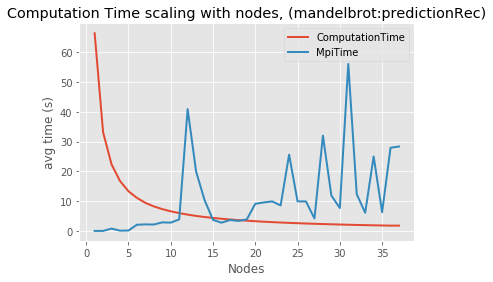

In [4]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
p0 = ax.plot(x, nodes, label=names[0], lw=2)
# p1 = ax.plot(x, draw, label=names[1], lw=2)
p2 = ax.plot(x, mpi, label=names[2], lw=2)
# p3 = ax.plot(x, balancer, label=names[3], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Computation Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()

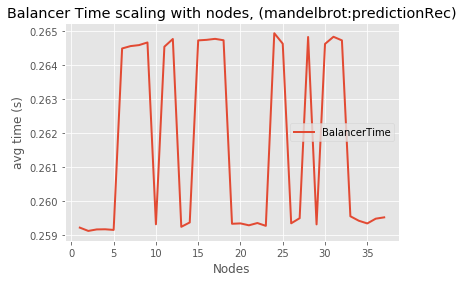

In [5]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
# p1 = ax.plot(x, draw, label=names[1], lw=2)
p3 = ax.plot(x, balancer, label=names[3], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Balancer Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()

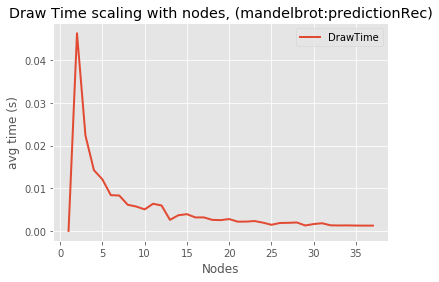

In [6]:
# Data for plotting
x = np.arange(len(nodes)) + 1
names = ["ComputationTime", "DrawTime", "MpiTime", "BalancerTime"]

plt.style.use('ggplot')
fig, ax = plt.subplots()
p1 = ax.plot(x, draw, label=names[1], lw=2)
ax.legend()

ax.set(xlabel='Nodes', ylabel='avg time (s)',
       title='Draw Time scaling with nodes, (mandelbrot:predictionRec)')
ax.grid(True)


# fig.savefig("impl_test.svg", format="svg")
plt.show()